# The Long Road to AGI Begins with Control, pts 1-3

Author: Breck Baldwin, breckbaldwin@gmail.com
July 18, 2025
w;AI (GPT4o)

Location of this notebook: https://github.com/breckbaldwin/llm-stability/blob/main/experiments/newsletter_1_3/analysis.ipynb

Substack: https://breckbaldwin.substack.com/p/the-long-road-to-agi-begins-with

LinkedIn: https://www.linkedin.com/pulse/long-road-agi-begins-control-problem-pt-1-breck-baldwin-farzf

This work is a continuation of the paper at: [Non-Determinism of “Deterministic” LLM Settings](https://arxiv.org/pdf/2408.04667). I'll try and make this notebook stand alone but I am extending that work conceptually and the code base so it is a place for more background. 

## Experiments

I made some minor changes to the `../../run_experiment.py` script to continue to reprocess rubrics from the benchmark if the LLMs reponses were deterministic, i.e., if on run 2 the rubric 23 gave a different response at the string level then the rubric was not included in the next run. The iterations were stopped if either the last 4 runs did not discover any new non-determinism, all rubrics had been shown to be non-determinsitic or the first two runs were identical. 

![Flow Diagram of Experiment Execution](./img/flow.png?v=1)

For you math heads in need of gratuitous formulaes (thank you ChatGPT for the diagram and LaTex) :

$$
\begin{aligned}
&\text{Let } R \text{ be the full set of rubrics} \\
&D_i = \text{Rubrics found non-deterministic at run } i \\
&\Delta_i = D_i \setminus \bigcup_{j=1}^{i-1} D_j \quad \text{(newly discovered)} \\
&\text{Stop at run } k \text{ if:} \\
&\quad \bigcup_{i=1}^{k} D_i = R \\
&\quad \textbf{or} \quad \Delta_{k-3} = \Delta_{k-2} = \Delta_{k-1} = \Delta_k = \emptyset \\
&\quad \textbf{or} \quad D_1 = D_2
\end{aligned}
$$

The command to run with some output is below, the `-n` parameter controls how many repeat runs are done, setting to `-1` invokes the termination conditions above:

```
llm-stability % python run_experiment.py -m models/mixtral-8x7b.py -mc '{"temperature":0.0, "seed": 12, "top_p_k": 0.0}' -t tasks/college_mathematics.py -tc '{"prompt_type": "v2", "shots": 0}' -n -1 
No existing file, running mixtral-8x7b-0.0-college_mathematics-0
Model loaded
Limiting test to first None rubrics
Data loaded
Making output directories if necessary local_runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38
File system ready for run
Running 0
100%|██████████████████████████████| 100/100 [15:40<00:00,  9.41s/it]
*** Wrote local_runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-0.csv [0]
Running 1
  0%|                                        | 0/100 [00:00<?, ?it/s]Non equivalent response 0
  1%|▎                               | 1/100 [00:09<16:01,  9.71s/it]Non equivalent response 1
  2%|▋                               | 2/100 [00:15<11:44,  7.19s/it]Non equivalent response 2
  3%|▉                               | 3/100 [00:18<08:48,  5.45s/it]Non equivalent response 3
  4%|█▎                              | 4/100 [00:25<09:59,  6.25s/it]Non equivalent response 4

<..elided..>

Non equivalent response 76
 93%|████████████████████████████▊  | 93/100 [01:18<00:03,  1.97it/s]Non equivalent response 98
100%|██████████████████████████████| 100/100 [01:25<00:00,  1.17it/s]
*** Wrote local_runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-2.csv [0, 81, 90]
Running 3
  6%|█▉                              | 6/100 [00:05<01:29,  1.05it/s]Non equivalent response 10
 54%|████████████████▋              | 54/100 [00:20<00:15,  2.97it/s]Non equivalent response 55
 56%|█████████████████▎         

<..ellided..>

Running 8
100%|██████████████████████████████| 100/100 [00:17<00:00,  5.88it/s]
*** Wrote local_runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-8.csv [0, 81, 90, 93, 94, 97, 97, 97, 97]
No non-determinism observed for past 4 runs, stopping
````
Note that the penultimate line lists the counts of non-deterministic rubrics found so far and the termination condition. 


### Load data

In [4]:
import glob
import pandas as pd
import tarfile
import os
import sys

sys.path.append(os.path.join(os.getcwd(),"..", ".."))

if not os.path.exists('runs'):
    with tarfile.open('runs.tgz', 'r:gz') as tar:
        tar.extractall()

experiments = glob.glob('runs/*/*.csv')
data_df = pd.DataFrame()
for exp_run in experiments:
    exp_run_df = pd.read_csv(exp_run)
    print(exp_run)
    data_df = pd.concat([data_df, exp_run_df])
    
filter = 'college_mathematics'

display_df = data_df[data_df['task'] == filter].copy()

display(display_df)


runs/deepseek_R1_0528-0.0-college_mathematics-0_2025-07-03_17-24-25/deepseek_R1_0528-0.0-college_mathematics-0-1.csv
runs/deepseek_R1_0528-0.0-college_mathematics-0_2025-07-03_17-24-25/deepseek_R1_0528-0.0-college_mathematics-0-0.csv
runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-0.csv
runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-1.csv
runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-3.csv
runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-2.csv
runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-6.csv
runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-7.csv
runs/mixtral-8x7b-0.0-college_mathematics-0_2025-07-04_05-41-38/mixtral-8x7b-0.0-college_mathematics-0-5.csv
run

,Unnamed: 0,model,model_config,task,task_config,rubric,rubric_id,question,modified_questions,gt,prompt,response,logprobs,date,run
0,0,deepseek_R1_0528,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""Let k be the number of real solutio...",0,Let k be the number of real solutions of the e...,Let k be the number of real solutions of the e...,(B),"[{""role"": ""user"", ""content"": ""Let k be the num...",<think>\nI need to solve this problem. It asks...,[],2025-07-03_17-24-25,0
1,1,deepseek_R1_0528,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""Up to isomorphism, how many additiv...",1,"Up to isomorphism, how many additive abelian g...","Up to isomorphism, how many additive abelian g...",(D),"[{""role"": ""user"", ""content"": ""Up to isomorphis...",<think>\nI need to find how many additive abel...,[],2025-07-03_17-24-25,0
2,2,deepseek_R1_0528,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""Suppose P is the set of polynomials...",2,Suppose P is the set of polynomials with coeff...,Suppose P is the set of polynomials with coeff...,(D),"[{""role"": ""user"", ""content"": ""Suppose P is the...",<think>\nThe problem states that P is the set ...,[],2025-07-03_17-24-25,0
3,3,deepseek_R1_0528,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""The shortest distance from the curv...",3,The shortest distance from the curve xy = 8 to...,The shortest distance from the curve xy = 8 to...,(A),"[{""role"": ""user"", ""content"": ""The shortest dis...",<think>\nI need to find the shortest distance ...,[],2025-07-03_17-24-25,0
4,4,deepseek_R1_0528,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""There are 25 suitcases, 5 of which ...",4,"There are 25 suitcases, 5 of which are damaged...","There are 25 suitcases, 5 of which are damaged...",(C),"[{""role"": ""user"", ""content"": ""There are 25 sui...",<think>\nI have this probability problem. Ther...,[],2025-07-03_17-24-25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,Llama-32-3B-Instruct-Q3_K_XL,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""If U and V are 3-dimensional subspa...",95,"If U and V are 3-dimensional subspaces of R^5,...","If U and V are 3-dimensional subspaces of R^5,...",(D),"[{""role"": ""user"", ""content"": ""If U and V are 3...",## Step 1: Recall the basic properties of subs...,[],2025-07-12_21-31-34,0
86,86,Llama-32-3B-Instruct-Q3_K_XL,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""Let S be the subset of R^2 consisti...",96,Let S be the subset of R^2 consisting of all p...,Let S be the subset of R^2 consisting of all p...,(C),"[{""role"": ""user"", ""content"": ""Let S be the sub...",## Step 1: Understand the definition of S\nS i...,[],2025-07-12_21-31-34,0
87,87,Llama-32-3B-Instruct-Q3_K_XL,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""Which of the following circles has ...",97,Which of the following circles has the greates...,Which of the following circles has the greates...,(C),"[{""role"": ""user"", ""content"": ""Which of the fol...",## Step 1: Understand the problem\nWe are give...,[],2025-07-12_21-31-34,0
88,88,Llama-32-3B-Instruct-Q3_K_XL,"{""temperature"": 0.0, ""seed"": 12, ""top_p_k"": 0.0}",college_mathematics,"{""prompt_type"": ""v2"", ""shots"": 0}","{""input"": ""X is a finite set with the followin...",98,X is a finite set with the following property:...,X is a 

## Results

The plot below is for the graph in Part 3 which is a super set of the plot in part 1. 

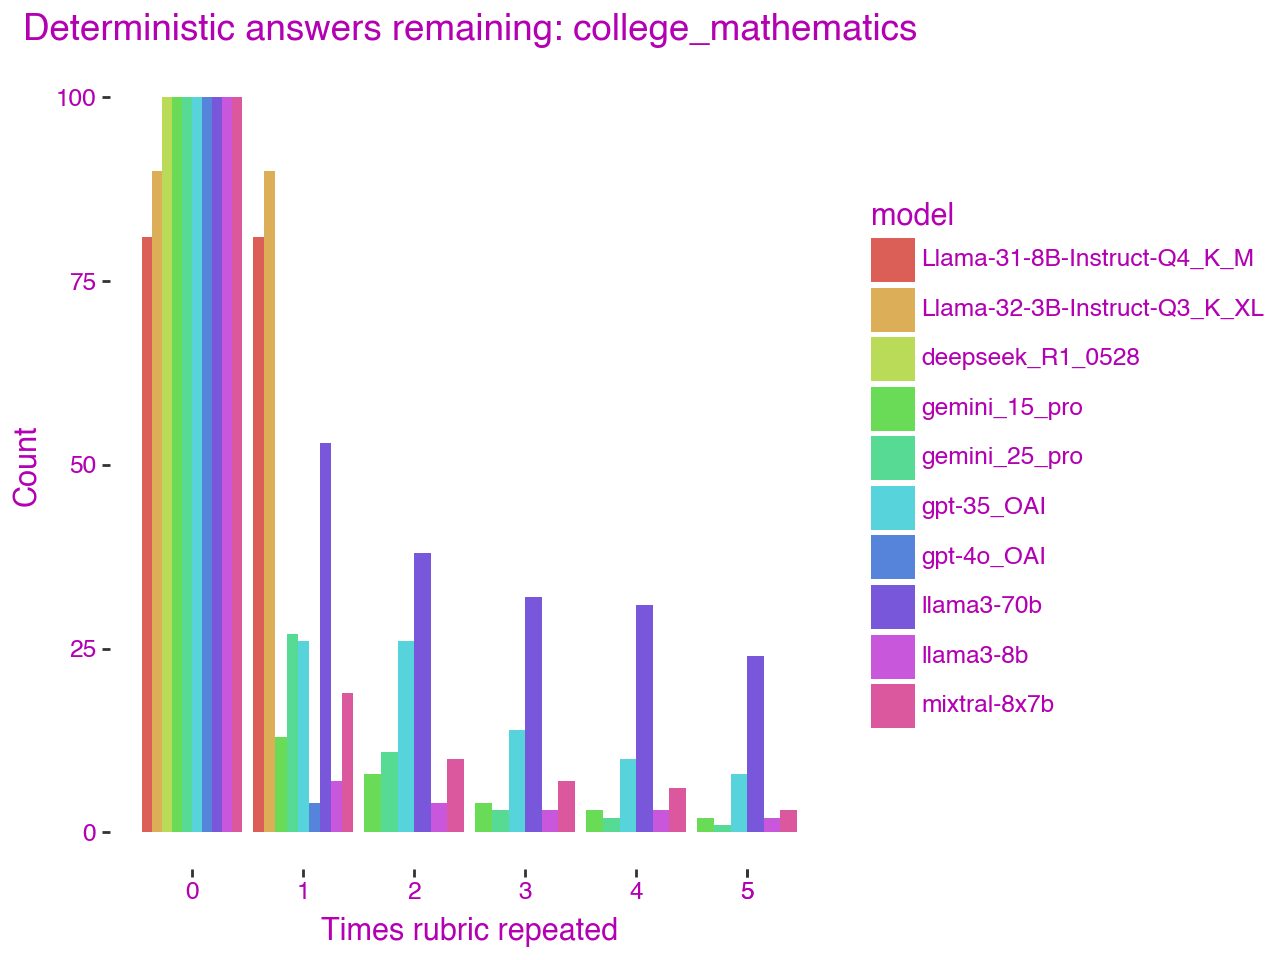

In [5]:
import plotnine as p9

def plot_counts(display_df):
     task = display_df['task'].unique()
     if len(task) > 1:
         raise AttributeError(f"more than one task {task}, cannot graph")
     color="#b300b3"
     breaks = [0, 1, 2, 3, 4, 5, display_df['run'].unique().max()]
     return (
     p9.ggplot(display_df, p9.aes(x='run', fill='model')) +
     p9.geom_bar(position=p9.position_dodge(width=0.9)) +
     p9.scale_x_continuous(breaks=breaks) +
     p9.labs(title=f'Deterministic answers remaining: {task[0]}',
          x='Times rubric repeated',
          y='Count') +
     p9.theme(axis_text_x=p9.element_text(),
               text=p9.element_text(color=color),
               axis_text=p9.element_text(color=color),
               plot_background=p9.element_rect(fill='none'),
               panel_background=p9.element_rect(fill='none'),
               panel_grid_minor_x=p9.element_blank(),
               panel_grid_minor_y=p9.element_blank(),
               panel_grid_major_x=p9.element_blank(),
               panel_grid_major_y=p9.element_blank()
               )
     )

display_df['run'] = pd.to_numeric(display_df['run'], errors='coerce')
#display(display_df)

#display(plot_counts(display_df))

focused_display_df = display_df[display_df['run'] < 6]

display(plot_counts(focused_display_df))
